# Import and data type correction
> Importing libraries and correcting datatypes of the data columns


In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
import pickle
import glob
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time

# !pip install reportlab pillow
# from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, Spacer, Table, TableStyle
# from reportlab.lib.pagesizes import letter
# from reportlab.lib.styles import getSampleStyleSheet
# from reportlab.lib import colors

drive.mount('/content/gdrive/', force_remount=True)
os.chdir("/content/gdrive/Shareddrives/STA 221/data")

Mounted at /content/gdrive/


In [ ]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


In [ ]:
df = pd.read_csv("train_with_datetime.csv", low_memory=False)


In [ ]:
df.shape

(177024, 509)

In [ ]:
df.iloc[:50].columns

Index(['id', 'p_num', 'time', 'bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40',
       'bg-5:35', 'bg-5:30', 'bg-5:25',
       ...
       'activity-0:35', 'activity-0:30', 'activity-0:25', 'activity-0:20',
       'activity-0:15', 'activity-0:10', 'activity-0:05', 'activity-0:00',
       'bg+1:00', 'datetime'],
      dtype='object', length=509)

In [ ]:
df.dtypes.value_counts()


,count
float64,433
object,76


In [ ]:
df.select_dtypes('object').head(5)

,id,p_num,time,activity-5:55,activity-5:50,activity-5:45,activity-5:40,activity-5:35,activity-5:30,activity-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,datetime
0,p01_0,p01,2024-11-25 06:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 06:10:00
1,p01_1,p01,2024-11-25 06:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 06:25:00
2,p01_2,p01,2024-11-25 06:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 06:40:00
3,p01_3,p01,2024-11-25 06:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 06:55:00
4,p01_4,p01,2024-11-25 07:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01 07:10:00


In [ ]:
X = df.iloc[:,:-2].copy()
y = df.iloc[:,-2]
print(y)

0         13.4
1         12.8
2         15.5
3         14.8
4         12.7
          ... 
177019    11.1
177020    10.9
177021    10.7
177022    10.5
177023    10.2
Name: bg+1:00, Length: 177024, dtype: float64


In [ ]:
all_cols = X.columns.tolist()

In [ ]:
bg_cols = [i for i in X if i[:2] == 'bg']
insulin_cols = [i for i in X if i[:7] == 'insulin']
carbs_cols = [i for i in X if i[:5] == 'carbs']
hr_cols = [i for i in X if i[:2] == 'hr']
steps_cols = [i for i in X if i[:5] == 'steps']
cals_cols = [i for i in X if i[:4] == 'cals']

activity_cols = [i for i in X if i[:8] == 'activity']

In [ ]:
# for activity_col in activity_cols[:2]:
#     unique_values = X[activity_col].unique()
#     for value in unique_values:
#     # Get the row numbers (indices) where the value appears
#       row_numbers = X[X[activity_col] == value].index.tolist()
#       print(f"Value: {value}, Row numbers: {row_numbers}")

In [ ]:
col_cats = [bg_cols,insulin_cols,carbs_cols,hr_cols,steps_cols,cals_cols]

for i in col_cats:
    print(len(i))

72
72
72
72
72
72


In [ ]:
col_dict = {
    'bg':bg_cols,
    'insulin':insulin_cols,
    'carbs':carbs_cols,
    'hr':hr_cols,
    'steps':steps_cols,
    'cals':cals_cols
}

activity_gauge = {
    'Indoor climbing':3,
    'Run':4,
    'Strength training':3,
    'Swim':2,
    'Bike':2,
    'Dancing':2,
    'Stairclimber':3,#2
    'Spinning':2,
    'Walking':1,
    'HIIT':4,
    'Outdoor Bike':2,
    'Walk':1,
    'Aerobic Workout':2,
    'Tennis':2,
    'Workout':2,
    'Hike':2,
    'Zumba':2,
    'Sport':3,
    'Yoga':2,
    'Swimming':2,
    'Weights':3, #2
    'Running':3
}

In [ ]:
global imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

def add_recent_changes(X):
    # Changes every 15 minutes
    for key in col_dict:
        print(key)
        category = key
        cols = col_dict[key]
        new_cols = []
        for i in range(-1,-13,-3):
            new_col = category+'_'+str(i)+'back3'
            print('Added Column: '+ new_col)
            X[new_col] = X[cols[i]] - X[cols[i-3]]
            new_cols.append(new_col)
        for i in range(-1,-4,-1):
            new_col = category+'_'+str(i)+'deriv'
            print('Added Column: '+ new_col)
            X[new_col] = X[new_cols[i]] - X[new_cols[i-1]]
    return X

def forward_fills(X):
    for col_type in col_cats:
        X[col_type] = X[col_type].ffill(axis = 1)
    return X

def drop_id_and_p_num_and_time(X):
    X = X.drop(['id','p_num','time'], axis = 1)
    return X

def translate_activities(X):
    X[activity_cols] = X[activity_cols].map(lambda x: activity_gauge[x] if x in activity_gauge else 0)
    return X

def all_transformations(X, fit_transform = 1):
    X = forward_fills(X)
    X = add_recent_changes(X)
    X = drop_id_and_p_num_and_time(X)
    X = translate_activities(X)


    # imputer section
    if fit_transform:
        X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)
    else:
        X = pd.DataFrame(imputer.transform(X), columns = X.columns)

    return X

In [ ]:
df.shape

(177024, 509)

In [ ]:
X.shape

(177024, 507)

In [ ]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

X = all_transformations(X)
X.shape

bg
Added Column: bg_-1back3
Added Column: bg_-4back3
Added Column: bg_-7back3
Added Column: bg_-10back3
Added Column: bg_-1deriv
Added Column: bg_-2deriv
Added Column: bg_-3deriv
insulin
Added Column: insulin_-1back3
Added Column: insulin_-4back3
Added Column: insulin_-7back3
Added Column: insulin_-10back3
Added Column: insulin_-1deriv
Added Column: insulin_-2deriv
Added Column: insulin_-3deriv
carbs
Added Column: carbs_-1back3
Added Column: carbs_-4back3
Added Column: carbs_-7back3
Added Column: carbs_-10back3
Added Column: carbs_-1deriv
Added Column: carbs_-2deriv
Added Column: carbs_-3deriv
hr
Added Column: hr_-1back3
Added Column: hr_-4back3
Added Column: hr_-7back3
Added Column: hr_-10back3
Added Column: hr_-1deriv
Added Column: hr_-2deriv
Added Column: hr_-3deriv
steps
Added Column: steps_-1back3
Added Column: steps_-4back3
Added Column: steps_-7back3
Added Column: steps_-10back3
Added Column: steps_-1deriv
Added Column: steps_-2deriv
Added Column: steps_-3deriv
cals
Added Column

(177024, 546)

OR for filling in the missing values

In [ ]:
# feature_cols = bg_cols + insulin_cols + carbs_cols + hr_cols + steps_cols + cals_cols

def drop_id_and_p_num(X):
    # Drop 'id' and 'p_num', but preserve 'time' for sine-cosine transformation
    X = X.drop(['id', 'p_num'], axis=1)
    return X

def linear_interpolation(X, col_cats):
    # Interpolate missing values linearly for the specified columns (col_cats)
    for colset in col_cats:
        if isinstance(colset, tuple):  # Check if it's a multi-level column
            X[colset] = X[colset].interpolate(axis=1, method='linear')
        else:
            X[colset] = X[colset].interpolate(axis=1, method='linear')
    return X

def apply_imputation(X, fit_transform=True):
    # Impute missing values for numeric columns using the median strategy
    numeric_cols = X.select_dtypes(include=['number']).columns
    imputer = SimpleImputer(strategy='median')

    if fit_transform:
        X[numeric_cols] = imputer.fit_transform(X[numeric_cols])
    else:
        X[numeric_cols] = imputer.transform(X[numeric_cols])

    return X

def sine_cosine_transformation(X, date_col='time'):
    # Ensure that the 'time' column is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(X[date_col]):
        print(f"Warning: {date_col} is not a datetime column. Converting it to datetime.")
        X[date_col] = pd.to_datetime(X[date_col], errors='coerce')

    if pd.api.types.is_datetime64_any_dtype(X[date_col]):
        X['sin_hour'] = np.sin(np.pi * X[date_col].dt.hour / 12)
        X['cos_hour'] = np.cos(np.pi * X[date_col].dt.hour / 12)
    else:
        print(f"Warning: {date_col} column could not be converted to datetime.")

    return X

def all_transformations(X, col_cats, date_col='time'):
    # Apply all transformations in sequence: interpolation, imputation, and sine-cosine transformation
    X = drop_id_and_p_num(X)
    X = linear_interpolation(X, col_cats)
    X = apply_imputation(X)
    X = sine_cosine_transformation(X, date_col)
    return X

X = all_transformations(X, col_cats)
X.shape

(177024, 507)

In [ ]:
X.isnull().sum().sum()

12548465

In [ ]:
X.dtypes.value_counts()

,count
float64,434
object,74
datetime64[ns],1


## Heatmap
> To visualize missing data values

In [ ]:
# converting column types to appropriate type

# column id
df['id'] = df['id'].astype('category')
# column p_num
df['p_num'] = df['p_num'].astype('category')

# column time
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# columns activity-*
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype('category')

print(df.info())
# df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Columns: 509 entries, id to datetime
dtypes: category(74), datetime64[ns](2), float64(433)
memory usage: 605.9 MB
None


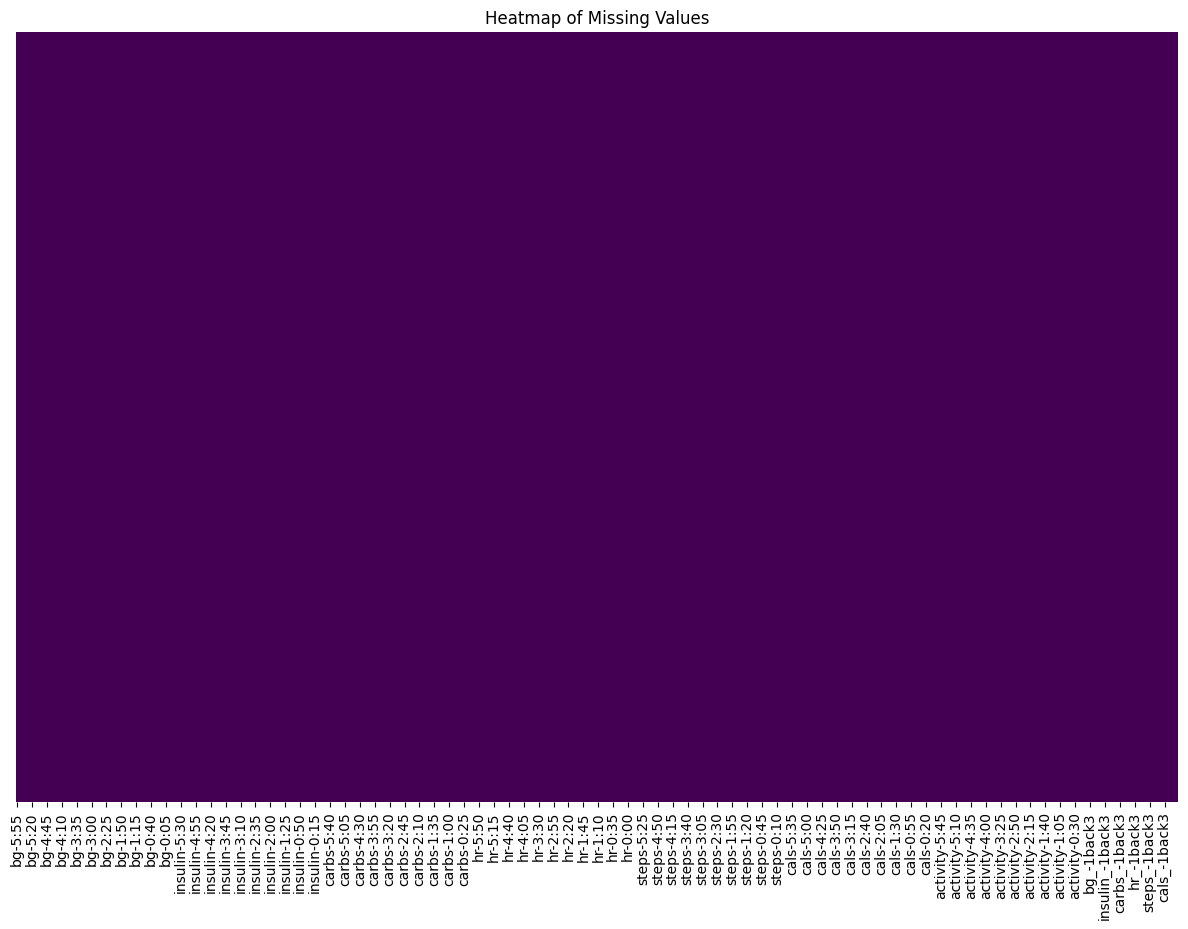

In [ ]:
plt.figure(figsize=(15, 10))
# sns.heatmap(X.isnull(), yticklabels=False, cbar=False, cmap='viridis')
sns.heatmap(X.isnull().mean(), cmap='viridis', cbar=False, annot=True, xticklabels=X.columns)
plt.title('Heatmap of Missing Values')
plt.show()


In [ ]:
X = pd.read_csv("train_knn_imputed_final.csv", low_memory=False)
#train_knn_imputed_log.csv
#train_knn_imputed_final.csv

#train_ffill_bfill_final.csv
#train_ffill_bfill_log.csv


In [ ]:
print(X.columns)

y = X['bg+1:00']

X = X.drop(columns=['id', 'p_num', 'time', 'bg+1:00', 'datetime'])
activity_columns = [col for col in X.columns if col.startswith('activity')]
X = X.drop(columns=activity_columns)

Index(['id', 'p_num', 'time', 'bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40',
       'bg-5:35', 'bg-5:30', 'bg-5:25',
       ...
       'activity-0:35', 'activity-0:30', 'activity-0:25', 'activity-0:20',
       'activity-0:15', 'activity-0:10', 'activity-0:05', 'activity-0:00',
       'bg+1:00', 'datetime'],
      dtype='object', length=509)


In [ ]:
random_forest = RandomForestRegressor(n_estimators = 15)
model = random_forest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:
start_time = time.time()
model.fit(X = X_train, y = y_train)
print('{} sec Train'.format(round((time.time() - start_time),0)))

1264.0 sec Train


In [ ]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)

RMSE: 0.19007801542559727


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# import numpy as np

# model = RandomForestRegressor(n_estimators=100, random_state=42)


cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

cv_scores = -cv_scores
print(f"Mean CV RMSE: {np.mean(cv_scores)}")
print(f"CV RMSE Std Dev: {np.std(cv_scores)}")


**Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X, y)

print("Best parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best score from RandomizedSearchCV:", random_search.best_score_)
best_model = random_search.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
# # Install xgboost (make sure you have GPU support enabled in Colab)
# !pip install xgboost

# import xgboost as xgb
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define parameter grid
# param_dist = {
#     'n_estimators': randint(10, 200),
#     'max_depth': randint(3, 30),
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'subsample': [0.5, 0.7, 1.0],
#     'colsample_bytree': [0.5, 0.7, 1.0],
#     'gamma': [0, 0.1, 0.5, 1]
# }

# # Create XGBoost model with GPU support
# model = xgb.XGBRegressor(tree_method='gpu_hist', random_state=42)

# # RandomizedSearchCV for hyperparameter tuning
# random_search = RandomizedSearchCV(model, param_distributions=param_dist,
#                                    n_iter=50, cv=5, verbose=2, n_jobs=-1, random_state=42)

# # Fit model
# random_search.fit(X, y)

# # Output results
# print("Best parameters from RandomizedSearchCV:", random_search.best_params_)
# print("Best score from RandomizedSearchCV:", random_search.best_score_)

# best_model = random_search.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X, y)

print("Best parameters from GridSearchCV:", grid_search.best_params_)
print("Best score from GridSearchCV:", grid_search.best_score_)

best_model = grid_search.best_estimator_
